# **TRABALHO FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO - 3**


Jonatas Goes da Silva   RA: 237948

Matheus Eduardo da Silva RA:230719

disponível em: https://www.kaggle.com/andreifnmg/campeonato-braileiro-20092018

Site base: https://www.transfermarkt.com.br/

**Roteiro:**

1-Escolha uma classe de modelo importando do Scikit.

2-Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.

3-Organize os dados em uma feature matrix e um target array.

4-Ajuste o modelo invocando o método fit().

5-Aplique o modelo aos novos dados usando predict().

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

brReviews = pd.read_csv("Tabela_Clubes.csv")
brReviews


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008,18,Santo Andre,11,8,19,46:61,-15,43,"25,1",3,6230000,145000,NaN,NaN,NaN,NaN
196,2008,12,Santos,12,13,13,58:58,0,33,"23,9",1,27850000,844000,NaN,NaN,NaN,NaN
197,2008,3,Sao Paulo,18,11,9,57:42,15,30,"23,9",1,46650000,1560000,NaN,NaN,NaN,NaN
198,2008,20,Sport,7,10,21,48:71,-23,30,25,1,15600000,520000,NaN,NaN,NaN,NaN


Retiramos as ultimas 3 colunas sem informação e adicionamos mais uma coluna com a classificação para libertadores



---



In [0]:
brReviews = brReviews.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [3]:
brReviews['Pontos'] = brReviews['Vitorias']*3 + brReviews['Empates']
brReviews['libertadores'] = False
brReviews.loc[[9,11,12,13,27,32,33,35,42,49,53,56,61,64,71,77,85,88,94,97,100,103,107,111,121,129,130,137,148,152,153,159,166,167,169,171,186,187,191,197], ['libertadores']] = True
brReviews.loc[[2,16,29,30,41,43], ['libertadores']] = True
brReviews

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Pontos,libertadores
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,48,False
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,61,False
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,64,True
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,50,False
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008,18,Santo Andre,11,8,19,46:61,-15,43,"25,1",3,6230000,145000,52,False
196,2008,12,Santos,12,13,13,58:58,0,33,"23,9",1,27850000,844000,49,False
197,2008,3,Sao Paulo,18,11,9,57:42,15,30,"23,9",1,46650000,1560000,63,True
198,2008,20,Sport,7,10,21,48:71,-23,30,25,1,15600000,520000,42,False


Pontuação dos clubes nas edições:

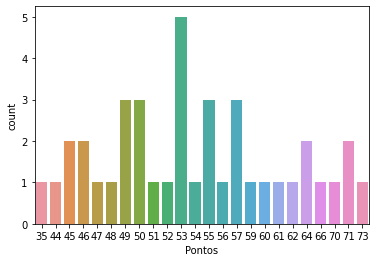

In [4]:
sns.countplot(x = brReviews.head(40)['Pontos'])

Criando de uma descrição:

In [0]:
def get_description(row):
    if row.Pontos < 50:
        return 'até 50 pts'
    elif row.Pontos <= 65:
        return 'até 65 pts'
    return 'mais de 65 pts'

brReviews['Description'] = brReviews.apply(get_description, axis=1)

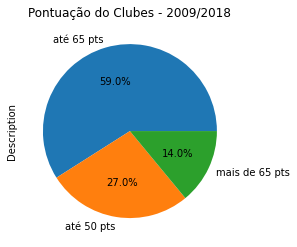

In [6]:
brReviews['Description'] = brReviews.apply(get_description, axis=1)
brReviews.Description.value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Pontuação do Clubes - 2009/2018')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


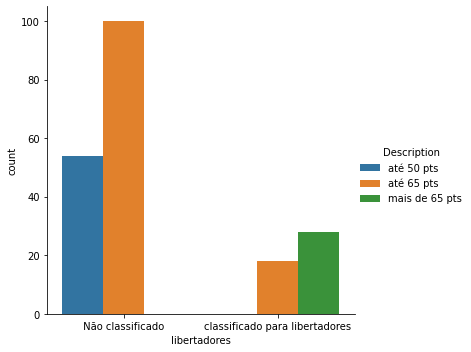

In [7]:
relegation_map = {0: ' Não classificado ', 1: 'classificado para libertadores'}
sns.factorplot('libertadores', data=brReviews, hue='Description', kind='count').set_xticklabels(relegation_map.values())

o modelo de aprendizado foi o **supervisionado** e os hiperparametros foram: **pontos, estrangeiros,valor total** 


**Por Naive Bayes:**

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
model_bayes = GaussianNB()                 # 2. Escolha dos hiperparâmetros e instanciação.

In [9]:
# 3.1 Feature Matrix
X_brReviews = brReviews.loc[: , [ "Pontos", "Estrangeiros", "Valor_total"] ]
X_brReviews.head()

,Pontos,Estrangeiros,Valor_total
0,48,0,27350000
1,61,3,37650000
2,64,6,61350000
3,50,2,34900000
4,52,4,25550000


Fase de aprendizado da máquina:

In [10]:
# 3.2 Target Array
y_brReviews = brReviews.libertadores
y_brReviews.head()

0    False
1    False
2     True
3    False
4    False
Name: libertadores, dtype: bool

Separação do banco de dados:

In [0]:
# 3.3 Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_brReviews, y_brReviews, random_state=2003)

Ajuste o modelo aos dados:

In [12]:

model_bayes.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Fazendo predições em dados novos:

In [0]:

y_model_bayes = model_bayes.predict(Xtest)

In [14]:
y_model_bayes

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

Acurácia(Bayes):

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_bayes)

0.8

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(ytest, y_model_bayes) 

Text(83.40000000000006, 0.5, 'Valores Reais')

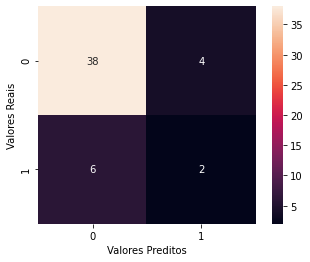

In [17]:
import matplotlib.pyplot as plt

sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

**Por regressão logística(classificação) e decision tree:**

In [18]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decisiont = DecisionTreeClassifier()       # 2
                                                 # 3    
model_decisiont.fit(Xtrain, ytrain)              # 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5 Faça predições em dados novos
y_model_decisiont = model_decisiont.predict(Xtest)

Acurácia(decision tree):

In [20]:
accuracy_score(ytest, y_model_decisiont)

0.84

Text(83.40000000000006, 0.5, 'Valores Reais')

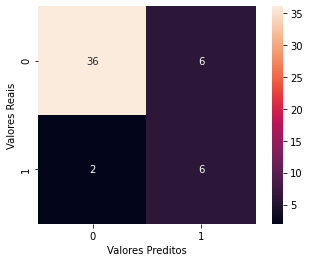

In [21]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')